In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path= r"C:\Users\lenovo\Desktop\Motor Insurance Dataset.csv" 

In [3]:
data=pd.read_csv(file_path)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  int64  
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  int64  
 5   VehAge      678013 non-null  int64  
 6   DrivAge     678013 non-null  int64  
 7   BonusMalus  678013 non-null  int64  
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  int64  
 11  Region      678013 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 62.1+ MB
None


In [5]:
print(data.head())

   IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0    1.0        1      0.10    D         5       0       55          50   
1    3.0        1      0.77    D         5       0       55          50   
2    5.0        1      0.75    B         6       2       52          50   
3   10.0        1      0.09    B         7       0       46          50   
4   11.0        1      0.84    B         7       0       46          50   

  VehBrand   VehGas  Density Region  
0      B12  Regular     1217    R82  
1      B12  Regular     1217    R82  
2      B12   Diesel       54    R22  
3      B12   Diesel       76    R72  
4      B12   Diesel       76    R72  


In [6]:
data.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


In [7]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Area', 'VehBrand', 'VehGas', 'Region'], dtype='object')


In [9]:
# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Area', 'VehBrand', 'VehGas', 'Region'], drop_first=True)


In [10]:
# Confirm new columns added
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   IDpol           678013 non-null  float64
 1   ClaimNb         678013 non-null  int64  
 2   Exposure        678013 non-null  float64
 3   VehPower        678013 non-null  int64  
 4   VehAge          678013 non-null  int64  
 5   DrivAge         678013 non-null  int64  
 6   BonusMalus      678013 non-null  int64  
 7   Density         678013 non-null  int64  
 8   Area_B          678013 non-null  bool   
 9   Area_C          678013 non-null  bool   
 10  Area_D          678013 non-null  bool   
 11  Area_E          678013 non-null  bool   
 12  Area_F          678013 non-null  bool   
 13  VehBrand_B10    678013 non-null  bool   
 14  VehBrand_B11    678013 non-null  bool   
 15  VehBrand_B12    678013 non-null  bool   
 16  VehBrand_B13    678013 non-null  bool   
 17  VehBrand_B

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
numerical_columns = ['Exposure', 'VehPower', 'VehAge', 'DrivAge', 'Density']
scaler = MinMaxScaler()

# Apply scaling
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Confirm scaling
print(data[numerical_columns].describe())


            Exposure       VehPower         VehAge        DrivAge  \
count  678013.000000  678013.000000  678013.000000  678013.000000   
mean        0.262057       0.223148       0.070443       0.335355   
std         0.181561       0.186446       0.056662       0.172408   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.088313       0.090909       0.020000       0.195122   
50%         0.242752       0.181818       0.060000       0.317073   
75%         0.491847       0.272727       0.110000       0.451220   
max         1.000000       1.000000       1.000000       1.000000   

             Density  
count  678013.000000  
mean        0.066351  
std         0.146622  
min         0.000000  
25%         0.003370  
50%         0.014519  
75%         0.061373  
max         1.000000  


In [12]:
# Create a binary target variable
data['Claim'] = data['ClaimNb'].apply(lambda x: 1 if x > 0 else 0)

# Drop the original ClaimNb column
data.drop('ClaimNb', axis=1, inplace=True)

# Confirm changes
print(data['Claim'].value_counts())


Claim
0    643953
1     34060
Name: count, dtype: int64


In [13]:
# Drop irrelevant columns (e.g., IDpol)
data.drop(['IDpol'], axis=1, inplace=True)

# Confirm the updated columns
print("Remaining Columns:\n", data.columns)


Remaining Columns:
 Index(['Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density',
       'Area_B', 'Area_C', 'Area_D', 'Area_E', 'Area_F', 'VehBrand_B10',
       'VehBrand_B11', 'VehBrand_B12', 'VehBrand_B13', 'VehBrand_B14',
       'VehBrand_B2', 'VehBrand_B3', 'VehBrand_B4', 'VehBrand_B5',
       'VehBrand_B6', 'VehGas_Regular', 'Region_R21', 'Region_R22',
       'Region_R23', 'Region_R24', 'Region_R25', 'Region_R26', 'Region_R31',
       'Region_R41', 'Region_R42', 'Region_R43', 'Region_R52', 'Region_R53',
       'Region_R54', 'Region_R72', 'Region_R73', 'Region_R74', 'Region_R82',
       'Region_R83', 'Region_R91', 'Region_R93', 'Region_R94', 'Claim'],
      dtype='object')


In [14]:
# Save the cleaned dataset
cleaned_file_path = r'C:\Users\lenovo\Desktop\cleaned_motor_insurance.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: C:\Users\lenovo\Desktop\cleaned_motor_insurance.csv


In [15]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = data.drop('Claim', axis=1)
y = data['Claim']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print("Class Distribution After Balancing:", Counter(y_balanced))


Class Distribution After Balancing: Counter({1: 643953, 0: 643953})


In [16]:
# Display the shapes of the balanced dataset
print("Balanced Features Shape:", X_balanced.shape)
print("Balanced Target Shape:", y_balanced.shape)



Balanced Features Shape: (1287906, 43)
Balanced Target Shape: (1287906,)


In [17]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Confirm the shapes of the datasets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (1030324, 43)
Testing Data Shape: (257582, 43)


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [20]:
# Initialize and train Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

print("Logistic Regression training complete.")


Logistic Regression training complete.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.linear_model import LogisticRegression

# Increase max_iter to 500
logistic_model = LogisticRegression(random_state=42, max_iter=500)
logistic_model.fit(X_train, y_train)

print("Logistic Regression training complete after increasing max_iter.")


Logistic Regression training complete after increasing max_iter.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Predict class labels
y_pred_logistic = logistic_model.predict(X_test)

# Predict probabilities for ROC-AUC calculation
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]


In [24]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.61      0.60      0.60    128385
           1       0.61      0.62      0.61    129197

    accuracy                           0.61    257582
   macro avg       0.61      0.61      0.61    257582
weighted avg       0.61      0.61      0.61    257582



In [25]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[76545 51840]
 [48923 80274]]


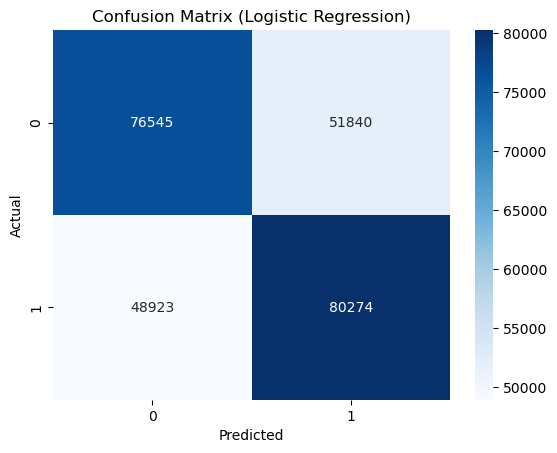

In [26]:
# Heatmap for confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score
roc_auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)
print("ROC-AUC Score (Logistic Regression):", roc_auc_logistic)


ROC-AUC Score (Logistic Regression): 0.6567553846855143


# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [64]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest training complete.")


Random Forest training complete.


In [70]:
# Predict class labels
y_pred_rf = rf_model.predict(X_test)

# Predict probabilities for ROC-AUC calculation
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [72]:
# Classification report
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.96      0.97      0.96    128385
           1       0.97      0.96      0.96    129197

    accuracy                           0.96    257582
   macro avg       0.96      0.96      0.96    257582
weighted avg       0.96      0.96      0.96    257582



In [74]:
# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)


Confusion Matrix:
 [[124582   3803]
 [  5469 123728]]


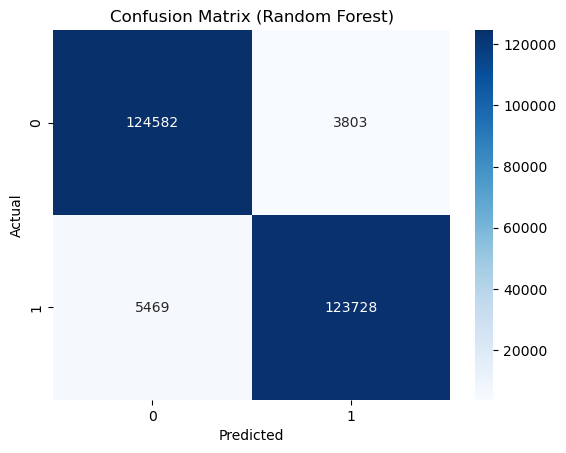

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [79]:
# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("ROC-AUC Score (Random Forest):", roc_auc_rf)


ROC-AUC Score (Random Forest): 0.9920328256270928


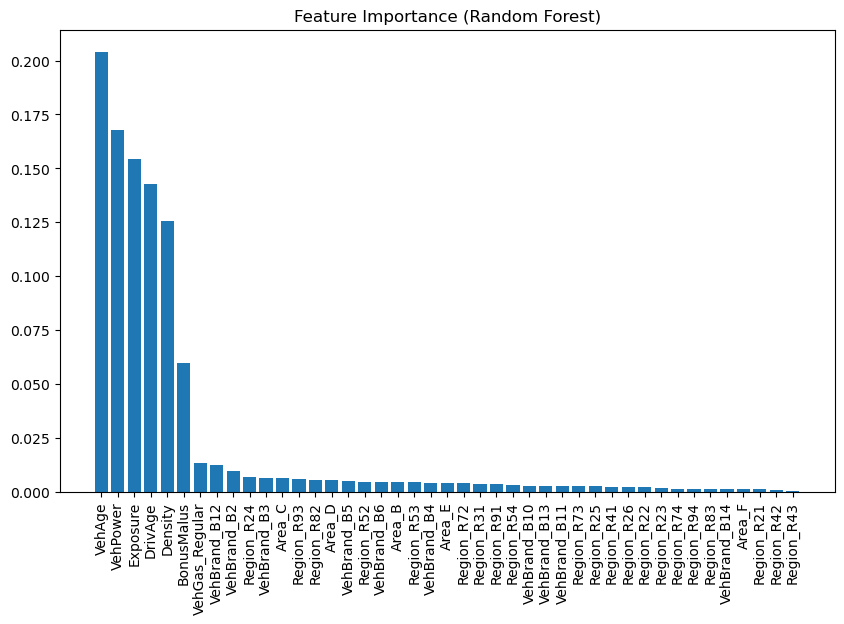

In [81]:
# Get feature importance
import numpy as np

feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()


# Comparision of Logistic Regression and Random Forest

In [84]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

  


In [90]:
# Evaluate Logistic Regression
logistic_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1-Score": f1_score(y_test, y_pred_logistic),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_logistic),
}

In [92]:
# Evaluate Random Forest
rf_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_rf),
}

In [94]:
# Combine Results into a DataFrame
comparison_df = pd.DataFrame([logistic_metrics, rf_metrics])

In [96]:
# Display the comparison
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.608812   0.607612  0.621330  0.614394  0.656755
1        Random Forest  0.964004   0.970180  0.957669  0.963884  0.992033


The project successfully achieved its goal of building a predictive model for insurance claims, providing actionable insights for risk management and decision-making. The Random Forest model stands out as the best-performing approach and is ready for deployment or further enhancement.

In [104]:
# Save the DataFrame as a CSV
comparison_df.to_csv("model_comparison.csv", index=False)
print("Model comparison saved as 'model_comparison.csv'.")


Model comparison saved as 'model_comparison.csv'.


In [106]:
# Create a DataFrame for Feature Importance
feature_importances_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Save the DataFrame as a CSV
feature_importances_df.to_csv("feature_importances.csv", index=False)
print("Feature importance data saved as 'feature_importances.csv'.")


Feature importance data saved as 'feature_importances.csv'.


Confusion matrix saved as 'confusion_matrix_rf.png'.


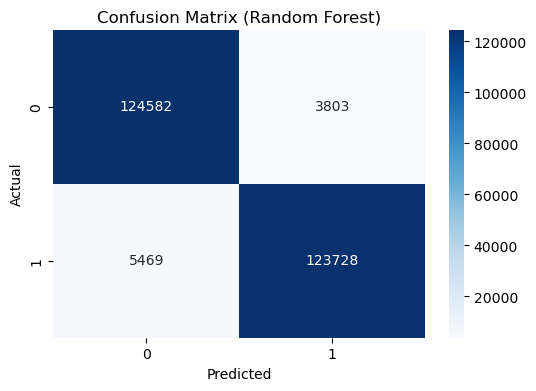

In [110]:
# Generate the Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Save the Plot as an Image
plt.savefig("confusion_matrix_rf.png")
print("Confusion matrix saved as 'confusion_matrix_rf.png'.")


In [112]:
# Save the cleaned dataset as a CSV
data.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.


In [114]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: C:\Users\lenovo\Desktop\Data Analysis Dataset\PROJECT FILES


In [118]:
# Set the directory where you want to save the files
save_directory = r"C:\Users\lenovo\Desktop\Data Analysis Dataset\PROJECT FILES"

# Save Model Comparison CSV
comparison_df.to_csv(os.path.join(save_directory, "model_comparison.csv"), index=False)

# Save Feature Importance CSV
feature_importances_df.to_csv(os.path.join(save_directory, "feature_importances.csv"), index=False)

# Save Confusion Matrix Image
conf_matrix_path = os.path.join(save_directory, "confusion_matrix_rf.png")
plt.savefig(conf_matrix_path)


<Figure size 640x480 with 0 Axes>

In [120]:
# List all files in the save directory
print("Files in Save Directory:")
print(os.listdir(save_directory))


Files in Save Directory:
['.ipynb_checkpoints', 'Bank Loan- SQL+EXCEL', 'cleaned_dataset.csv', 'confusion_matrix_rf.png', 'feature_importances.csv', 'Insurance Claims- SQL+ POWER BI', 'model_comparison.csv', 'Motor Insurance- Python+ML', 'Motor_Insurance.ipynb', 'SQLQuery1.sql']
